In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten,AveragePooling2D
from keras.optimizers import Adam, SGD
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping


In [39]:
train = '../raw_data/train/'
test = '../raw_data/test/'
valid = '../raw_data/val/'

In [9]:
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train, 'train')

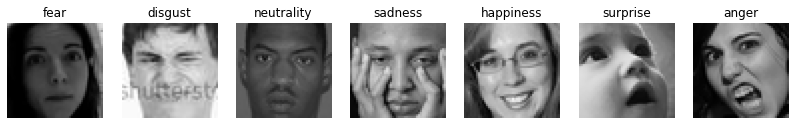

In [22]:
plt.figure(figsize=(14,22))
i = 1
img_sample = []
for expression in os.listdir(train):
    img = load_img((train + expression +'/'+ os.listdir(train + expression)[4]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [37]:
img_sample.size

(224, 224)

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.5,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train,
                                                batch_size=16,
                                                target_size=(224,224),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 3150 images belonging to 7 classes.


In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test,
                                                batch_size=16,
                                                target_size=(224,224),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 175 images belonging to 7 classes.


In [44]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_set = test_datagen.flow_from_directory(valid,
                                                batch_size=16,
                                                target_size=(224,224),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 175 images belonging to 7 classes.


In [48]:
def initialize_model():
    model = models.Sequential()

    ### First convolution & max-pooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(224, 224, 1), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer (let's say a classification with 10 output)
    model.add(layers.Dense(7, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

model = initialize_model()

In [52]:
es = EarlyStopping(patience=2)

model.fit(training_set,
          batch_size=16,
          epochs=10,
          validation_data=val_set,
          callbacks=[es])

Epoch 1/10
197/197 [==============================] - 24s 118ms/step - loss: 2.5041 - accuracy: 0.1518 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/10
197/197 [==============================] - 24s 122ms/step - loss: 1.9460 - accuracy: 0.1391 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/10
197/197 [==============================] - 25s 127ms/step - loss: 1.9461 - accuracy: 0.1380 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/10
197/197 [==============================] - 24s 119ms/step - loss: 1.9460 - accuracy: 0.1414 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/10
197/197 [==============================] - 25s 125ms/step - loss: 1.9461 - accuracy: 0.1493 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/10
197/197 [==============================] - 24s 124ms/step - loss: 1.9460 - accuracy: 0.1486 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 7/10
197/197 [==============================] - 24s 119ms/step - loss: 1.9461 - accuracy: 0.1250 - val_loss: 1.9459 - val_ac

In [53]:
def init_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(7, activation='softmax'))
    
    return model

In [54]:
mod = initialize_model()
mod.fit(training_set,
          batch_size=16,
          epochs=10,
          validation_data=val_set,
          callbacks=[es])

Epoch 1/10
197/197 [==============================] - 23s 116ms/step - loss: 1.9793 - accuracy: 0.1364 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/10
197/197 [==============================] - 24s 122ms/step - loss: 1.9542 - accuracy: 0.1455 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/10
197/197 [==============================] - 24s 121ms/step - loss: 1.9461 - accuracy: 0.1352 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/10
197/197 [==============================] - 24s 122ms/step - loss: 1.9460 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/10
197/197 [==============================] - 24s 120ms/step - loss: 1.9460 - accuracy: 0.1493 - val_loss: 1.9459 - val_accuracy: 0.1429
